In [1]:
from proveit import specialStatementMagic # for %begin_theorems and %end_theorems
from proveit.expression import Lambda
from proveit.basiclogic import In, NotIn, Forall, Equals, NotEquals, And
from proveit.number import Summation, DiscreteContiguousSet, Abs, Neg, Add, Subtract, Multiply, Fraction, \
    Exponentiate, Sqrt
from proveit.number import GreaterThan, GreaterThanEquals, LessThan, LessThanEquals, DiscreteContiguousSet, Mod
from proveit.number.arithmeticOps import Integrate, IntervalCC, IntervalCO, IntervalOO
from proveit.statistics import Prob
from proveit.common import a, b, l, t, eps, k
from proveit.number.common import zero, one, two, three, four, five, eight, e, pi, i, Reals, Naturals, NaturalsPos, Integers, Complexes, EvenFuncs, MonDecFuncs
from proveit.linalg import MatrixProd, ScalarProd
from proveit.physics.quantum import Bra, Ket, Circuit, Gate, Input, Output, MultiWire
from proveit.physics.quantum.common import ket0, ket1, Hgate, CTRL_DN, invRoot2
from proveit.physics.quantum.QPE.common import u_, n_, t_, phase_, m_, b_, delta_, two_pow_t, two_pow_t_minus_one, \
  alpha_l, alpha_l_sqrd, fullDomain, negDomain, posDomain, epsDomain, U_pow_two_pow_k 
from proveit.physics.quantum.QPE.phaseEstOps import Psuccess, Pfail, ModAdd
from IPython.display import display


Convenience methods for building expressions:

In [2]:
def exp2pi_i(*exp_factors):
    return Exponentiate(e, Multiply(*((two, pi, i) + exp_factors)))

def exp2pi_i_on_two_pow_t(*exp_factors):
    return Exponentiate(e, Fraction(Multiply(*((two, pi, i) + exp_factors)), two_pow_t))

def expNeg2pi_i_on_two_pow_t(*exp_factors):
    return Exponentiate(e, Fraction(Neg(Multiply(*((two, pi, i) + exp_factors))), two_pow_t))

display(exp2pi_i(a, b))
display(exp2pi_i_on_two_pow_t(a, b))
display(expNeg2pi_i_on_two_pow_t(a, b))

In [3]:
%begin_theorems

Take care of number domain issues:

In [4]:
two_pow_t_in_posnats = In(two_pow_t, NaturalsPos)
two_pow_t_in_posnats

In [5]:
two_pow_tMinusOne_in_posnats = In(Exponentiate(two, Subtract(t_, one)), NaturalsPos)
two_pow_tMinusOne_in_posnats

In [6]:
two_pow_t_less_one_in_posnats = In(Subtract(two_pow_t, one), NaturalsPos)
two_pow_t_less_one_in_posnats

In [7]:
two_pow_t_not_zero = NotEquals(two_pow_t, zero)
two_pow_t_not_zero

In [8]:
modAddClosure = Forall((a, b), In(ModAdd(a, b), Integers), domain=Integers)
modAddClosure

In [9]:
phaseInReals = In(phase_, Reals)
phaseInReals

In [10]:
bestInInts = In(b_, Integers)
bestInInts

In [11]:
posDomainInFullDomain = Forall(eps, Forall(l, In(l, fullDomain), domain=posDomain), domain=NaturalsPos)
posDomainInFullDomain

In [12]:
negDomainInFullDomain = Forall(eps, Forall(l, In(l, fullDomain), domain=negDomain), domain=NaturalsPos)
negDomainInFullDomain

This derives from $\delta$ being the difference between $\delta$ and its best $t$-bit estimate (without going over):

In [13]:
scaledDeltaInInterval = In(Multiply(two_pow_t, delta_), IntervalCO(zero, one))
scaledDeltaInInterval

In [14]:
deltaInReals = In(delta_, Reals)
deltaInReals

In [15]:
successProbInReals = Forall(eps, In(Psuccess(eps), Reals), domain=NaturalsPos)
successProbInReals

In [16]:
all_alpha_l_in_complexes = Forall(l, In(alpha_l, Complexes), Integers)
all_alpha_l_in_complexes

In [17]:
all_abs_alpha_l_nonneg = Forall(l, And(In(Abs(alpha_l), Reals), GreaterThanEquals(Abs(alpha_l), zero)), Integers)
all_abs_alpha_l_nonneg

Follows from scaledDeltaInInterval:

In [18]:
scaledDelta_notEq_nonzeroInt = Forall(l, NotEquals(Multiply(two_pow_t, delta_), l), domain=Integers, conditions = NotEquals(l, zero))
scaledDelta_notEq_nonzeroInt

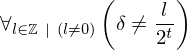

In [19]:
delta_notEq_scaledNonzeroInt = Forall(l, NotEquals(delta_, Fraction(l, two_pow_t)), domain=Integers, conditions = NotEquals(l, zero))
delta_notEq_scaledNonzeroInt

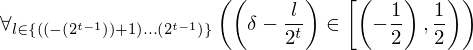

In [20]:
deltaDiffInInterval = Forall(l, In(Subtract(delta_, Fraction(l, two_pow_t)), IntervalCO(Neg(Fraction(one, two)), Fraction(one, two))), domain=fullDomain)
deltaDiffInInterval

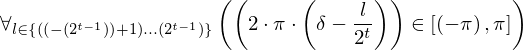

In [21]:
scaledDeltaDiffInInterval = Forall(l, In(Multiply(two, pi, Subtract(delta_, Fraction(l, two_pow_t))), IntervalCC(Neg(pi), pi)), domain=fullDomain)
scaledDeltaDiffInInterval

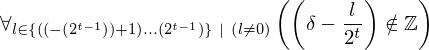

In [22]:
nonIntDeltaDiff = Forall(l, NotIn(Subtract(delta_, Fraction(l, two_pow_t)), Integers), 
                         domain=fullDomain,
                         conditions = [NotEquals(l, zero)])
nonIntDeltaDiff

Success probability as sum of individual success event probabilities:

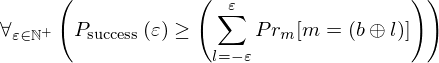

In [23]:
success_sum = Forall(eps, GreaterThanEquals(Psuccess(eps), Summation(l, Prob(Equals(m_, ModAdd(b_, l)), m_), 
                                                          DiscreteContiguousSet(Neg(eps), eps))),
                    domain=NaturalsPos)
success_sum

Failure probability as sum of individual failure event probabilities in terms of $\alpha_l$, amplitude of $\lvert \Psi \rangle$ for a state specified relative to $b$ (the best outcome state):

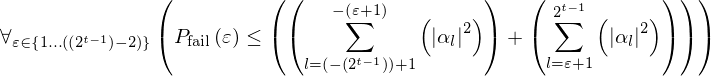

In [24]:
fail_sum = Forall(eps, LessThanEquals(Pfail(eps), Add(Summation(l, alpha_l_sqrd, 
                                                            negDomain),
                                                  Summation(l, alpha_l_sqrd, 
                                                            posDomain))),
                 domain=epsDomain)
fail_sum

Modulo addition may be converted to regular addition within $2 \pi i$ exponentiation:

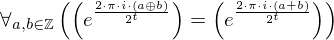

In [25]:
exp2pi_i_modadd = Forall((a, b), Equals(exp2pi_i_on_two_pow_t(ModAdd(a, b)), 
                                       exp2pi_i_on_two_pow_t(Add(a, b))), domain=Integers)
exp2pi_i_modadd

Direct evaluation of $\alpha_l$ (via an intermediate step first):

In [5]:
from proveit.expression import LATEX
intermediateQPE = Forall(k, 
                         Circuit([[Input(ket0), Hgate, CTRL_DN, 
                                   Output(Add(ScalarProd(invRoot2, ket0), 
                                              ScalarProd(Fraction(exp2pi_i(phase_, Exponentiate(two, k)), 
                                                                  Sqrt(two)), 
                                                         ket1)))],
                                  [Input(Ket(u_)), MultiWire(n_), Gate(U_pow_two_pow_k), Output(Ket(u_))]]),
                         domain=Naturals)
print intermediateQPE.formatted(LATEX)

\forall_{ k  \in \mathbb{N}} \left[
\begin{array}{cc}
\Qcircuit @C=1em @R=.7em { & \lstick{\lvert 0 \rangle} & \gate{H} & \ctrl{1} & \rstick{ \left(\frac{1}{\sqrt{2}}   \lvert 0 \rangle\right) + \left(\frac{e^{ 2 \cdot \pi \cdot i \cdot \varphi \cdot \left(2^{k}\right) }}{\sqrt{2}}   \lvert 1 \rangle\right) } \qw \\  & \lstick{\lvert u \rangle} & /^{n} \qw & \gate{U^{2^{k}}} & \rstick{\lvert u \rangle} \qw} & ~ 
\end{array}
\right]


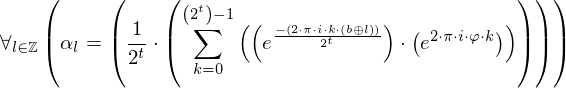

In [27]:
alpha_l_eval = Forall(l, Equals(alpha_l, 
                                Multiply(Fraction(one, two_pow_t),
                                         Summation(k, Multiply(expNeg2pi_i_on_two_pow_t(k, ModAdd(b_, l)), 
                                                          exp2pi_i(phase_, k)),
                                                   DiscreteContiguousSet(zero, Subtract(two_pow_t, one))))),
                     domain=Integers)
alpha_l_eval

Evaluation of $\alpha_l$ after performing the geometric series summation in terms of $\delta$:

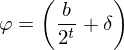

In [28]:
phaseFromBest = Equals(phase_, Add(Fraction(b_, two_pow_t), delta_))
phaseFromBest

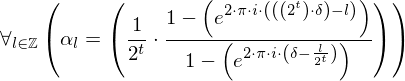

In [29]:
alpha_l_summed = Forall(l, Equals(alpha_l, Multiply(Fraction(one, two_pow_t), 
                                                    Fraction(Subtract(one, exp2pi_i(Subtract(Multiply(two_pow_t, delta_), l))),
                                                             Subtract(one, exp2pi_i(Subtract(delta_, Fraction(l, two_pow_t))))))),
                       domain=Integers)
alpha_l_summed

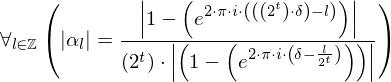

In [30]:
alpha_l_summed_abs = Forall(l,
                           Equals(Abs(alpha_l),
                        Fraction(
                                Abs(Subtract(one,
                                            Exponentiate(e,
                                                        Multiply(two,pi,i,
                                                                Subtract(
                                                                        Multiply(
                                                                                Exponentiate(two,t_),delta_),
                                                                        l)
                )))
    ),
                            Multiply(Exponentiate(two,t_),    
                            Abs(Subtract(one,
                                            Exponentiate(e,
                                                        Multiply(two,pi,i,
                                                                Subtract(
                                                                        delta_,
                                                                        Fraction(l,Exponentiate(two,t_))
                                

)
                                                                 )
                    )
                                             )
                                    ))
        )
    ),
                           domain=Integers)
alpha_l_summed_abs

$| \alpha_l |^2$ inequality to bound the failure probability:

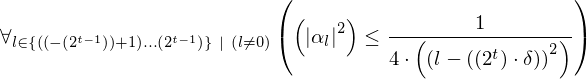

In [31]:
alpha_l_sqrd_ineq = Forall(l, LessThanEquals(alpha_l_sqrd, 
                                             Fraction(one, 
                                                      Multiply(four, 
                                                               Exponentiate(Subtract(l, 
                                                                                     Multiply(two_pow_t, 
                                                                                              delta_)), 
                                                                            two)))),
                           domain=fullDomain,
                           conditions=NotEquals(l, zero))
alpha_l_sqrd_ineq

A bound on the failure probability:

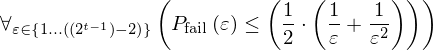

In [32]:
fail_ineq = Forall(eps, LessThanEquals(Pfail(eps), Multiply(Fraction(one,two), 
                                                            Add(Fraction(one,eps), 
                                                                Fraction(one, Exponentiate(eps, two))))), 
                   domain=epsDomain)
fail_ineq

In [33]:
%end_theorems

Creating theorems *.dill and *.pv_it files in the __pv_it__ directory
These theorems may be imported from proveit.physics.quantum.QPE.theorems
